<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


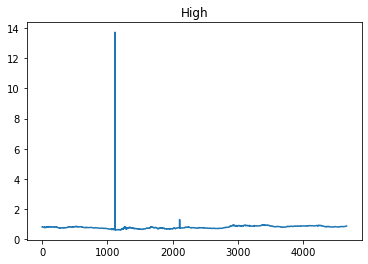

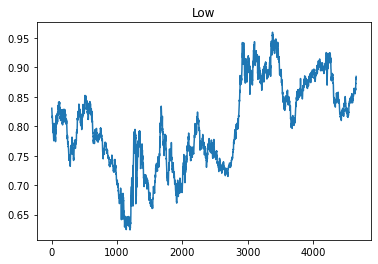

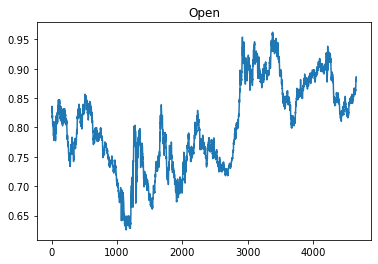

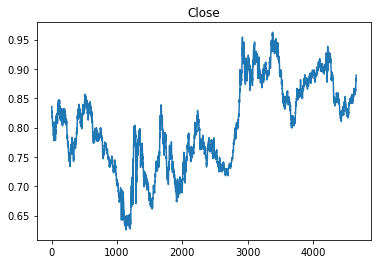

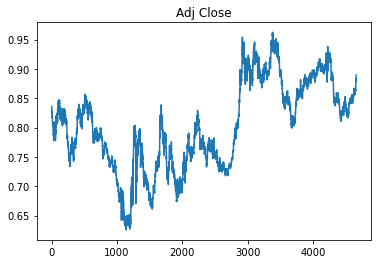

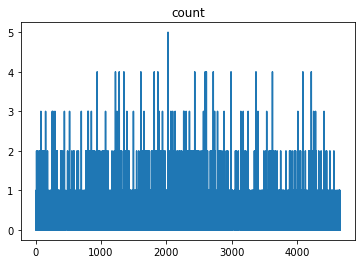

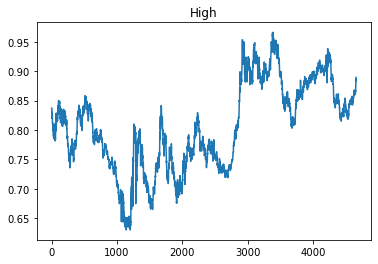

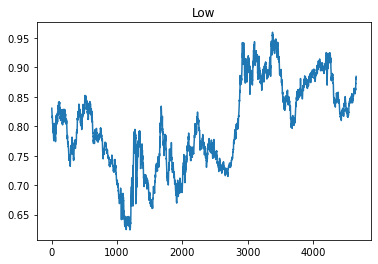

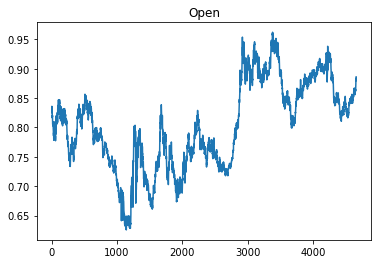

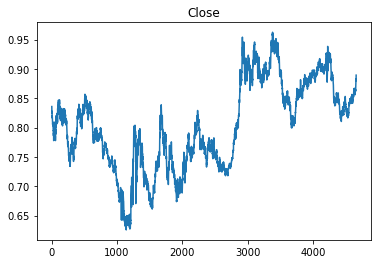

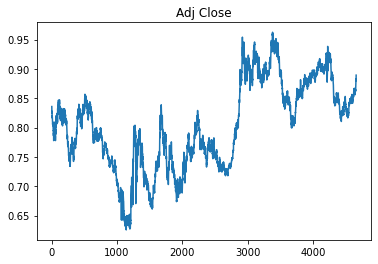

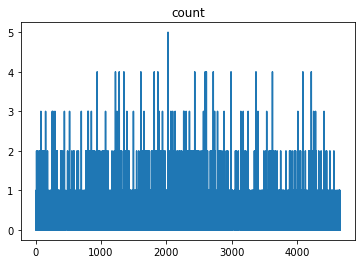

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data_collection/data.csv")


df.drop("Volume",1,inplace=True)

df.info()

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()
    

df.drop(df[df.High > 1].index, inplace=True)

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

### Data cleaning

In [7]:
dft = pd.read_csv("../data_collection/data_text.csv", index_col=0)

In [8]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1941 non-null   object
 1   years   1941 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [9]:
dft.head()

,text,years
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021


In [12]:
dft.text[0].split("\n")[0]

'PRESS RELEASE'

In [13]:
dft.text[0].split("\n")[1]

'ECB to redesign euro banknotes by 2024'

In [14]:
dft.text[0].split("\n")[2]

'6 December 2021'

In [16]:
dft.text[0].split("\n")[3:-9]

['ECB expects to select new euro banknote designs by 2024',
 'ECB to seek the opinion of the public',
 'Multidisciplinary group to advise Governing Council on new themes',
 'The European Central Bank (ECB) plans to redesign euro banknotes, working with European citizens in a process that is expected to lead to a final decision in 2024.',
 'The redesign process will start with the creation of focus groups, tasked with gathering opinions from people across the euro area on possible themes for the future euro banknotes. A theme advisory group with one expert from each euro area country will then submit a shortlist of new themes to the ECB’s Governing Council. The members of the advisory group have already been appointed by the ECB based on proposals from euro area national central banks, and are drawn from diverse fields such as history, natural and social sciences, the visual arts and technology. Current euro banknote designs are based on an “ages and styles” theme, represented by window

In [22]:
dft.text.apply(lambda x: x.split("\n")[3:-9])

0       [ECB expects to select new euro banknote desig...
1       [Improvement in availability of external finan...
2       [Framework assesses security and efficiency of...
3       [Near-term pandemic-related risks to financial...
4       [Doris Schneeberger to take up role on 1 Febru...
                              ...                        
1936    [This mission was undertaken as part of the re...
1937                                                   []
1938                                                   []
1939    [The Governing Council also decided on an allo...
1940    [As a result of the adoption of the euro by Gr...
Name: text, Length: 1941, dtype: object

In [26]:
dft.text[1940].split("\n")[2:-9]

['Yesterday, 1 January 2001, the euro was introduced in Greece. Greece has thus become the twelfth EU Member State to adopt the single currency and the first one to do so since the start of Stage Three of Economic and Monetary Union (EMU) on 1 January 1999. The European Central Bank (ECB) welcomes this first enlargement of the euro area.',
 "As a result of the adoption of the euro by Greece, the Bank of Greece is now a full member of the Eurosystem, with the same rights and obligations as the 11 national central banks of the other EU Member States that have adopted the euro. In particular, in accordance with Article 49 of the Statute of the European System of Central Banks and of the European Central Bank (Statute of the ESCB), the Bank of Greece today paid up the remainder of its contribution to the capital of the ECB, as well as its share of the ECB's reserves. In accordance with Article 49 of the Statute of the ESCB, the Bank of Greece also transferred to the ECB its contribution to

In [27]:
def clean_text_main(x):
    l = x.split("\n")
    if l[0] == "PRESS RELEASE":
        return " ".join(x.split("\n")[3:-9])
    else:
        return " ".join(x.split("\n")[2:-9])

In [28]:
clean_text_main(dft.text[1940])

"Yesterday, 1 January 2001, the euro was introduced in Greece. Greece has thus become the twelfth EU Member State to adopt the single currency and the first one to do so since the start of Stage Three of Economic and Monetary Union (EMU) on 1 January 1999. The European Central Bank (ECB) welcomes this first enlargement of the euro area. As a result of the adoption of the euro by Greece, the Bank of Greece is now a full member of the Eurosystem, with the same rights and obligations as the 11 national central banks of the other EU Member States that have adopted the euro. In particular, in accordance with Article 49 of the Statute of the European System of Central Banks and of the European Central Bank (Statute of the ESCB), the Bank of Greece today paid up the remainder of its contribution to the capital of the ECB, as well as its share of the ECB's reserves. In accordance with Article 49 of the Statute of the ESCB, the Bank of Greece also transferred to the ECB its contribution to the 

In [29]:
clean_text_main(dft.text[0])

'ECB expects to select new euro banknote designs by 2024 ECB to seek the opinion of the public Multidisciplinary group to advise Governing Council on new themes The European Central Bank (ECB) plans to redesign euro banknotes, working with European citizens in a process that is expected to lead to a final decision in 2024. The redesign process will start with the creation of focus groups, tasked with gathering opinions from people across the euro area on possible themes for the future euro banknotes. A theme advisory group with one expert from each euro area country will then submit a shortlist of new themes to the ECB’s Governing Council. The members of the advisory group have already been appointed by the ECB based on proposals from euro area national central banks, and are drawn from diverse fields such as history, natural and social sciences, the visual arts and technology. Current euro banknote designs are based on an “ages and styles” theme, represented by windows, doorways and b

In [31]:
dft["main_text"]= dft.text.apply(clean_text_main)

In [32]:
dft.head()

,text,years,main_text
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021,ECB expects to select new euro banknote design...
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021,Improvement in availability of external financ...
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021,Framework assesses security and efficiency of ...
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021,Near-term pandemic-related risks to financial ...
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021,Doris Schneeberger to take up role on 1 Februa...


In [33]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1941 non-null   object
 1   years      1941 non-null   object
 2   main_text  1941 non-null   object
dtypes: object(3)
memory usage: 125.2+ KB


In [37]:
def clean_text_title(x):
    l = x.split("\n")
    if l[0] == "PRESS RELEASE":
        return "".join(x.split("\n")[1])
    else:
        return "".join(x.split("\n")[0])

In [38]:
clean_text_title(dft.text[1940])

'Greece now a member of European Economic and Monetary Union'

In [39]:
clean_text_title(dft.text[0])

'ECB to redesign euro banknotes by 2024'

In [40]:
dft["title"]= dft.text.apply(clean_text_title)

In [41]:
dft.head()

,text,years,main_text,title
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021,ECB expects to select new euro banknote design...,ECB to redesign euro banknotes by 2024
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021,Improvement in availability of external financ...,Survey on the Access to Finance of Enterprises...
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021,Framework assesses security and efficiency of ...,Eurosystem publishes new framework for oversee...
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021,Near-term pandemic-related risks to financial ...,ECB Financial Stability Review shows pandemic ...
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021,Doris Schneeberger to take up role on 1 Februa...,ECB appoints Doris Schneeberger as Director Ba...


In [42]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1941 entries, 0 to 1940
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1941 non-null   object
 1   years      1941 non-null   object
 2   main_text  1941 non-null   object
 3   title      1941 non-null   object
dtypes: object(4)
memory usage: 140.4+ KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4660 non-null   object 
 1   High       4660 non-null   float64
 2   Low        4660 non-null   float64
 3   Open       4660 non-null   float64
 4   Close      4660 non-null   float64
 5   Adj Close  4660 non-null   float64
 6   count      4660 non-null   float64
dtypes: float64(6), object(1)
memory usage: 291.2+ KB


In [49]:
dft.years = pd.to_datetime(dft.years)
df.Date = pd.to_datetime(df.Date)

In [53]:
dfm = pd.merge(dft, df, left_on="years", right_on="Date")

In [54]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   text       1459 non-null   object        
 1   years      1459 non-null   datetime64[ns]
 2   main_text  1459 non-null   object        
 3   title      1459 non-null   object        
 4   Date       1459 non-null   datetime64[ns]
 5   High       1459 non-null   float64       
 6   Low        1459 non-null   float64       
 7   Open       1459 non-null   float64       
 8   Close      1459 non-null   float64       
 9   Adj Close  1459 non-null   float64       
 10  count      1459 non-null   float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 136.8+ KB


In [55]:
dfm.head()

,text,years,main_text,title,Date,High,Low,Open,Close,Adj Close,count
0,PRESS RELEASE\nEurosystem publishes new framew...,2021-11-22,Framework assesses security and efficiency of ...,Eurosystem publishes new framework for oversee...,2021-11-22,0.88950,0.884600,0.88610,0.8893,0.8893,0.0
1,PRESS RELEASE\nECB Financial Stability Review ...,2021-11-17,Near-term pandemic-related risks to financial ...,ECB Financial Stability Review shows pandemic ...,2021-11-17,0.88727,0.882301,0.88369,0.8833,0.8833,1.0
2,PRESS RELEASE\nECB appoints Doris Schneeberger...,2021-11-12,Doris Schneeberger to take up role on 1 Februa...,ECB appoints Doris Schneeberger as Director Ba...,2021-11-12,0.87458,0.872610,0.87353,0.8733,0.8733,1.0
3,PRESS RELEASE\nECB publishes consolidated bank...,2021-11-04,Total assets of EU-headquartered credit instit...,ECB publishes consolidated banking data for en...,2021-11-04,0.86736,0.860800,0.86090,0.8609,0.8609,1.0
4,PRESS RELEASE\nECB appoints Cornelia Holthause...,2021-11-02,Cornelia Holthausen to take up role on 1 Decem...,ECB appoints Cornelia Holthausen as Director G...,2021-11-02,0.86362,0.860956,0.86194,0.8621,0.8621,1.0


In [69]:
dfm["target"] = dfm.apply(lambda x: 0 if ( x.Close - x.Open) > 0 else 1, 1)

In [71]:
dfm.head()

,text,years,main_text,title,Date,High,Low,Open,Close,Adj Close,count,target
0,PRESS RELEASE\nEurosystem publishes new framew...,2021-11-22,Framework assesses security and efficiency of ...,Eurosystem publishes new framework for oversee...,2021-11-22,0.88950,0.884600,0.88610,0.8893,0.8893,0.0,0
1,PRESS RELEASE\nECB Financial Stability Review ...,2021-11-17,Near-term pandemic-related risks to financial ...,ECB Financial Stability Review shows pandemic ...,2021-11-17,0.88727,0.882301,0.88369,0.8833,0.8833,1.0,1
2,PRESS RELEASE\nECB appoints Doris Schneeberger...,2021-11-12,Doris Schneeberger to take up role on 1 Februa...,ECB appoints Doris Schneeberger as Director Ba...,2021-11-12,0.87458,0.872610,0.87353,0.8733,0.8733,1.0,1
3,PRESS RELEASE\nECB publishes consolidated bank...,2021-11-04,Total assets of EU-headquartered credit instit...,ECB publishes consolidated banking data for en...,2021-11-04,0.86736,0.860800,0.86090,0.8609,0.8609,1.0,1
4,PRESS RELEASE\nECB appoints Cornelia Holthause...,2021-11-02,Cornelia Holthausen to take up role on 1 Decem...,ECB appoints Cornelia Holthausen as Director G...,2021-11-02,0.86362,0.860956,0.86194,0.8621,0.8621,1.0,0


In [73]:
dfm.target.value_counts()

1    851
0    608
Name: target, dtype: int64

In [79]:
# under sample; 
df1 = dfm[dfm.target == 1].sample(608)
df0 = dfm[dfm.target == 0].sample(608)

df2 = pd.concat([df1,df0]).reset_index(drop=True)[["main_text", "target"]]
df2.sample(10)

,main_text,target
1156,"In the first half of 2004, a total of 307,223 ...",0
785,Today the Eurosystem launched successfully the...,0
377,At today’s meeting the Governing Council of th...,1
298,On 23 November 2012 the Governing Council of t...,1
71,"At today’s meeting, which was held in Venice, ...",1
987,The information published on this page has bee...,0
1123,The Governing Council has decided to increase ...,0
692,Firms and banks to be severely affected if cli...,0
902,Survey results consistent with moderation in g...,0
866,At today’s meeting the Governing Council of th...,0


In [150]:
df2.to_csv("data.csv")

In [82]:
import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [83]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [84]:
df2["text2"] = df2.main_text.apply(cleaning)

In [85]:
df2.head()

,main_text,target,text2
0,Oil prices behind downward revisions to inflat...,1,oil price behind downward revision inflation e...
1,The European Central Bank (ECB) today publishe...,1,european central bank ecb today publishes dece...
2,"353,000 counterfeit euro banknotes were withdr...",1,counterfeit euro banknote withdrawn circulatio...
3,The Governing Council of the European Central ...,1,governing council european central bank today ...
4,The Governing Council of the European Central ...,1,governing council european central bank ecb de...


In [86]:
positive_words =[]

for review in df2[df2.target == 1]["text2"]:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:200]

'oil price behind downward revision inflation expectation inflation expectation broadly unchanged real gdp growth expectation stable indicating gradual recovery unemployment expectation broadly unchang'

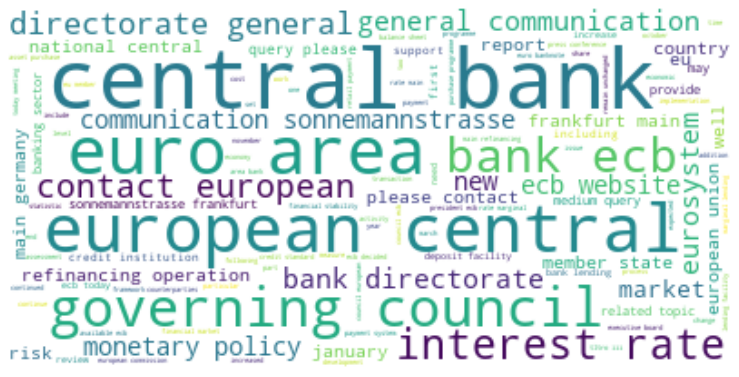

In [87]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [88]:
negative_words =[]

for review in df2[df2.target == 0]["text2"]:
    negative_words.append(review) 
negative_words = ' '.join(negative_words)
negative_words[:200]

'opening concert europachorakademie introducing european cantata series cultural day european central bank initiated give frankfurt main seat european central bank ecb flavour culture one eu country ye'

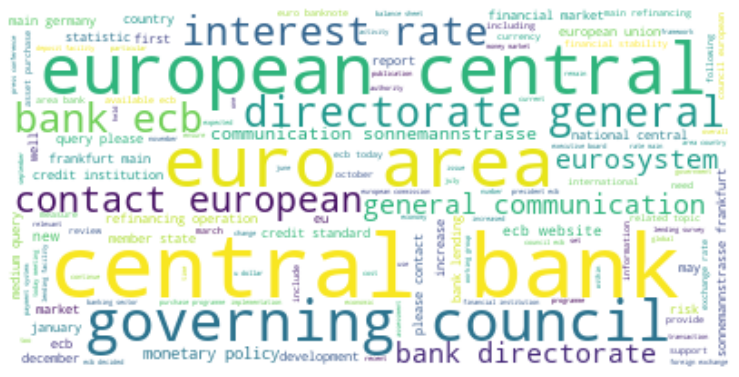

In [89]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words))

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
X = df2['text2']
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [128]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
vectorizer.fit(X_train)

CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [129]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [130]:
tf_idf_word_vectorizer =TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [131]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [132]:
model = LogisticRegression()
model.fit(X_train_count, y_train)


log_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(log_count_acc)

0.5248333333333333


In [133]:
import seaborn as sns

<AxesSubplot:>

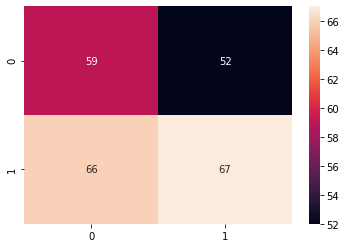

In [134]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50       111
           1       0.56      0.50      0.53       133

    accuracy                           0.52       244
   macro avg       0.52      0.52      0.52       244
weighted avg       0.52      0.52      0.52       244



In [136]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word, y_train)


log_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(log_tf_acc)

0.5696666666666667


<AxesSubplot:>

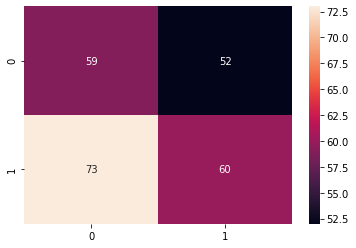

In [137]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49       111
           1       0.54      0.45      0.49       133

    accuracy                           0.49       244
   macro avg       0.49      0.49      0.49       244
weighted avg       0.50      0.49      0.49       244



In [139]:
model = SVC()
model.fit(X_train_count, y_train)

svm_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(svm_count_acc)


0.5486666666666667


<AxesSubplot:>

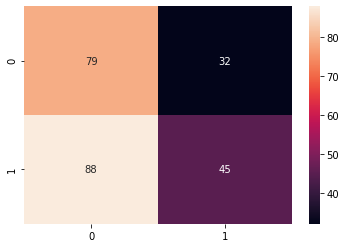

In [140]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.71      0.57       111
           1       0.58      0.34      0.43       133

    accuracy                           0.51       244
   macro avg       0.53      0.53      0.50       244
weighted avg       0.53      0.51      0.49       244



In [142]:
model = SVC()
model.fit(X_train_tf_idf_word, y_train)


svm_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(svm_tf_acc)

0.5691666666666666


In [143]:
model = RandomForestClassifier()
model.fit(X_train_count, y_train)

rf_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(rf_count_acc)

0.5371666666666666


<AxesSubplot:>

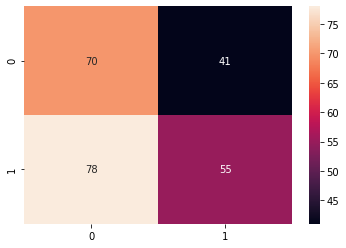

In [144]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.63      0.54       111
           1       0.57      0.41      0.48       133

    accuracy                           0.51       244
   macro avg       0.52      0.52      0.51       244
weighted avg       0.53      0.51      0.51       244



In [146]:
model = RandomForestClassifier()
model.fit(X_train_tf_idf_word, y_train)


rf_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(rf_tf_acc)

0.532


In [147]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_count, y_train)

ada_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(ada_count_acc)

0.5253333333333333


In [148]:
model = AdaBoostClassifier()
model.fit(X_train_tf_idf_word, y_train)


ada_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(ada_tf_acc)

0.585


Text(0.5, 1.0, 'Cv Score of Different Models')

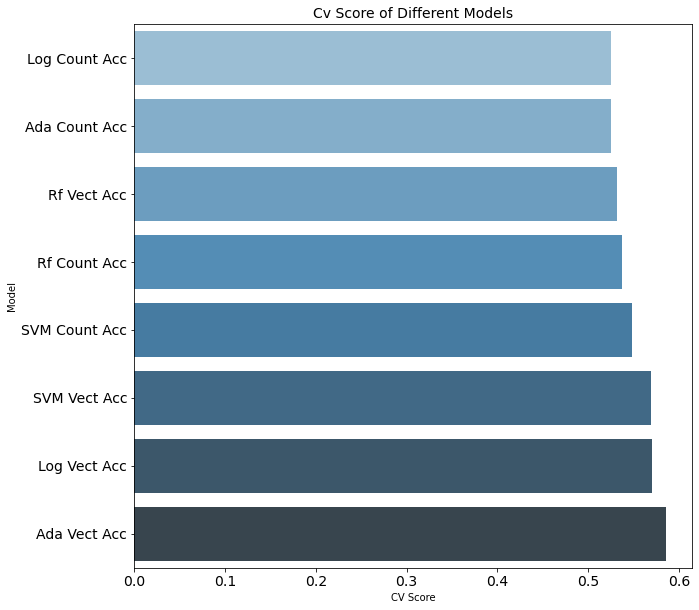

In [149]:
compare = pd.DataFrame({"Model": ["Log Count Acc", "Log Vect Acc",
                                  "SVM Count Acc","SVM Vect Acc","Ada Count Acc","Ada Vect Acc","Rf Count Acc","Rf Vect Acc"],
                        "CV Score": [log_count_acc, log_tf_acc,svm_count_acc, svm_tf_acc,ada_count_acc,ada_tf_acc,rf_count_acc,rf_tf_acc]})

compare = compare.sort_values(by="CV Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="CV Score", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Cv Score of Different Models", size=14)

In [152]:
import tensorflow as tf

In [170]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(5, activation="relu"),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
                                  ])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_tf_idf_word.toarray(), y_train, epochs=50)

Epoch 1/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5247
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5967
Epoch 3/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5998
Epoch 4/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6574
Epoch 5/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6358
Epoch 6/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.7119
Epoch 7/50
31/31 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.7315
Epoch 8/50
31/31 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7500
Epoch 9/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7778
Epoch 10/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7932
Epoch 11/50
31/31 [

In [171]:
model.evaluate(X_test_tf_idf_word.toarray(), y_test)

8/8 [==============================] - 0s 1000us/step - loss: 1.4863 - accuracy: 0.5451


[1.4863409996032715, 0.5450819730758667]